In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tueplots.constants.color import rgb
from tueplots import bundles
import os

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 300, 'font.family': 'Times New Roman', 'font.size': 1})

In [12]:
df = pd.read_csv("./../../dat/Publications.csv")
df = df.drop_duplicates(subset=['Professor', 'Title'], keep='first')
professors = df["Professor"].unique()

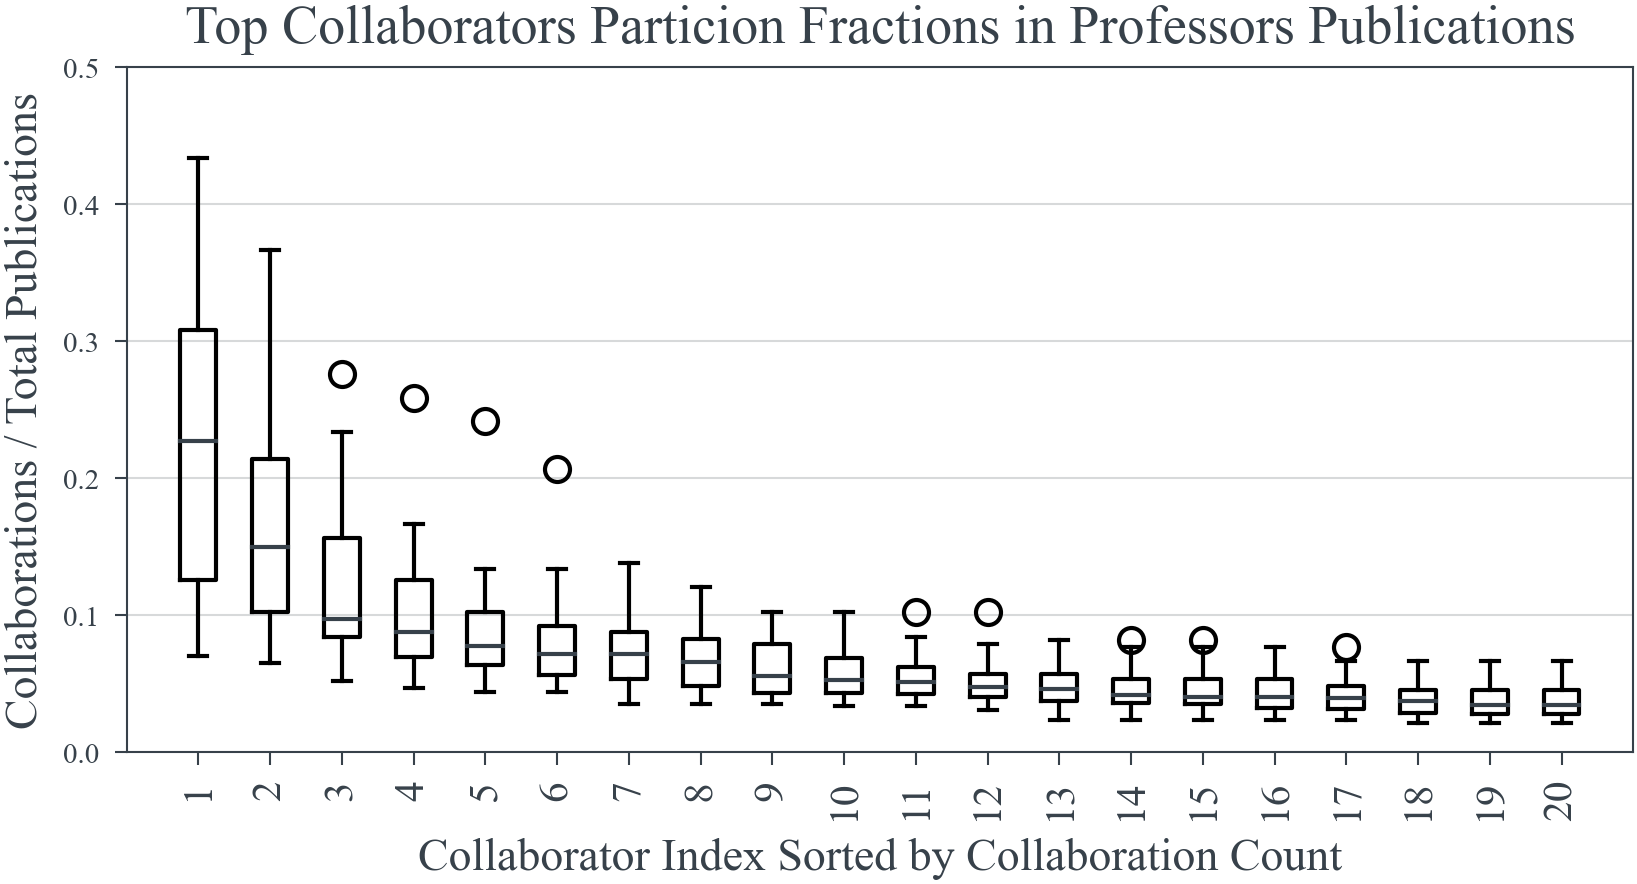

In [20]:
top_collaborator_amount = 20

professors_total_papers = {prof: 0 for prof in professors}
professors_collab_count = {prof: {} for prof in professors}

for _, row in df.iterrows():
    prof = row.iloc[0]
    professors_total_papers[prof] += 1
    for coauthor in row.iloc[4].split(';'):
        if (coauthor != prof):
            if coauthor in professors_collab_count[prof]:
                professors_collab_count[prof][coauthor] +=1
            else:
                professors_collab_count[prof][coauthor] = 1                 

for prof in professors_collab_count:
    professors_collab_count[prof] = dict(sorted(professors_collab_count[prof].items(), key=lambda item: item[1], reverse=True))

#create a boxplot that shows the combined fractions of collaborations over their total amount of publications by their top collaborators
average_collab_fractions = np.zeros(top_collaborator_amount)
collab_fractions_list = []
prof_most_collab_fraction_list = []

for professor in professors:
    collaborators_fractions = []
    most_collaborated_professor_fraction = 0
    for collaborator in professors_collab_count[professor]:
        collaborators_fractions.append(professors_collab_count[professor][collaborator])
        if most_collaborated_professor_fraction == 0 and collaborator in professors:
            most_collaborated_professor_fraction = professors_collab_count[professor][collaborator]
    collaborators_fractions = (np.array(collaborators_fractions)/professors_total_papers[professor])[:top_collaborator_amount]
    average_collab_fractions += collaborators_fractions
    collab_fractions_list.append(collaborators_fractions)


mean_most_collab_professor_fraction = sum(prof_most_collab_fraction_list)/len(professors)
collab_fractions_list = np.array(collab_fractions_list)
average_collab_fractions /= len(professors)
fig, ax = plt.subplots()
fig.set_size_inches(fig.get_size_inches()[0], 3)


ax.boxplot(collab_fractions_list)
ax.set_ylim([0, 0.5])
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.grid(axis="y", which="major", color=rgb.tue_dark, linewidth=0.5)

ax.set_xlim([0,top_collaborator_amount+1])
ax.set_xticks(np.arange(top_collaborator_amount)+1)
ax.tick_params(axis='x', rotation=90, labelsize=10)
    
ax.set_xlabel('Collaborator Index Sorted by Collaboration Count', fontsize = 11)
ax.set_ylabel('Collaborations / Total Publications', fontsize = 11)
ax.set_title(f'Top Collaborators Particion Fractions in Professors Publications', fontsize = 13)
    
fig.savefig('./fig_CollaborationFractionsBoxplot.pdf')
plt.show()